<a href="https://colab.research.google.com/github/Cloud2602/Risk-Estimation-from-Multi-Sensor-Motion-Data/blob/main/Risk_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Risk Estimation from Multi Sensor Motion Data

### Download Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# For v1.0 version of mini dataset
!wget https://man-truckscenes.s3.eu-central-1.amazonaws.com/release/mini/man-truckscenes_metadata_v1.0-mini.zip
!wget https://man-truckscenes.s3.eu-central-1.amazonaws.com/release/mini/man-truckscenes_sensordata_v1.0-mini.zip
!unzip "man-truckscenes_*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716774203324.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716774255266.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716774301638.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716774353886.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716774405448.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716774451912.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716774502890.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716774554263.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716774601671.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716774653074.pcd  

In [ ]:
%%bash
mkdir -p /content/data
cd "/content/drive/MyDrive"
unzip -o "man-truckscenes_*.zip" -d "/content"

Archive:  man-truckscenes_sensordata_v1.0-mini.zip
   creating: /content/man-truckscenes/
   creating: /content/man-truckscenes/samples/
   creating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473372666841.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473373166828.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473373666803.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473374166792.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473374667278.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473375166805.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473375666769.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BAC


2 archives were successfully processed.


Open github repository

In [ ]:
!git clone https://github.com/Cloud2602/Risk-Estimation-from-Multi-Sensor-Motion-Data.git

Cloning into 'Risk-Estimation-from-Multi-Sensor-Motion-Data'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
Receiving objects: 100% (12/12), done.
Resolving deltas: 100% (2/2), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)


## Initialization

In [14]:
!pip install truckscenes-devkit[all]

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 102.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 79.9 MB/s eta 0:00:00
   ━━━

In [2]:
%matplotlib inline
from truckscenes import TruckScenes

trucksc = TruckScenes('v1.0-mini', 'man-truckscenes', True)

Loading truckscenes tables for version v1.0-mini...
11 attribute,
18 calibrated_sensor,
27 category,
20090 ego_motion_cabin,
20089 ego_motion_chassis,
20116 ego_pose,
1094 instance,
400 sample,
25750 sample_annotation,
43556 sample_data,
10 scene,
18 sensor,
4 visibility,
Done loading in 1.213 seconds.
Reverse indexing ...
Done reverse indexing in 0.2 seconds.


## BEV Prova

In [ ]:
!mkdir /content/man-truckscenes/samples/BEV


In [ ]:
import json

file_path = "/content/man-truckscenes/v1.0-mini/sample_data.json"

try:
    with open(file_path, 'r') as f:
        data = json.load(f)
    print("✅ JSON caricato correttamente.")
except json.JSONDecodeError as e:
    print("❌ Errore nel parsing del file JSON:")
    print(f"  Messaggio: {e.msg}")
    print(f"  Riga: {e.lineno}, Colonna: {e.colno}")
    print(f"  Posizione: {e.pos}")

    # Stampa la riga problematica
    with open(file_path, 'r') as f:
        lines = f.readlines()
        if e.lineno <= len(lines):
            print("\n🔍 Riga con l'errore:")
            print(lines[e.lineno - 1].rstrip())
        else:
            print("⚠️ Impossibile accedere alla riga dell'errore: fuori intervallo.")
except FileNotFoundError:
    print("❌ File non trovato.")
except Exception as e:
    print(f"❌ Altro errore: {e}")


✅ JSON caricato correttamente.


In [ ]:
# Mostra i primi 5 sample_token validi
valid_samples = trucksc.sample
for i in range(5):
    print(f"[{i}] sample_token:", valid_samples[i]['token'])


[0] sample_token: 32d2bcf46e734dffb14fe2e0a823d059
[1] sample_token: deb7b3f332f042d49e7636d6e4959354
[2] sample_token: a574551be31547e4b7c78ff87c75abb3
[3] sample_token: 1393759bf6ff4f8e88deff0da0dc2aca
[4] sample_token: 368662645c194921b716c026347db664


In [ ]:
record = trucksc.get('sample', "32d2bcf46e734dffb14fe2e0a823d059")
print(record)

{'token': '32d2bcf46e734dffb14fe2e0a823d059', 'scene_token': '044c648ac12345f1aedf33c9f91cdc5a', 'timestamp': 1695473372698161, 'prev': '', 'next': 'deb7b3f332f042d49e7636d6e4959354', 'data': {'RADAR_RIGHT_BACK': 'c790efd2151d491aae635234a5df26d8', 'RADAR_RIGHT_SIDE': '7f3083ba7f2e49678b4ccbc2fd14f590', 'RADAR_RIGHT_FRONT': '36c9a2c6b3ee4d9f9d01c902521cbb27', 'RADAR_LEFT_FRONT': '1e6375db490e4563b55fce389b06a53b', 'RADAR_LEFT_SIDE': 'c58e24c2e644404f85a5c0901d367338', 'RADAR_LEFT_BACK': 'e940e3abeab34da8833e013c84b52366', 'LIDAR_LEFT': '9ae8f9fd6cd2458298c82eb6a85119a6', 'LIDAR_RIGHT': '28a12ab75263458a977dd29ca4e54ee2', 'LIDAR_TOP_FRONT': '1ac1e8bcd1ed4493a73c011dc2441713', 'LIDAR_TOP_LEFT': '85c18e7eeb3c42f194eba257dcf6d66c', 'LIDAR_TOP_RIGHT': '064d8efa5f31493db10f96dbeef91282', 'LIDAR_REAR': '18b4fe677dc7408b84ebd555c559da16', 'CAMERA_LEFT_FRONT': '7625b794c8a14e918dc23113ee5d10da', 'CAMERA_LEFT_BACK': 'c6e32737071942fb9d5bcd8c69a88181', 'CAMERA_RIGHT_FRONT': '4e11f21f05be46f3b219a

### immagine di prova

<ipython-input-6-acae677eb106>:48: RuntimeWarning: overflow encountered in scalar add
  R_chan[xi, yi] += 1


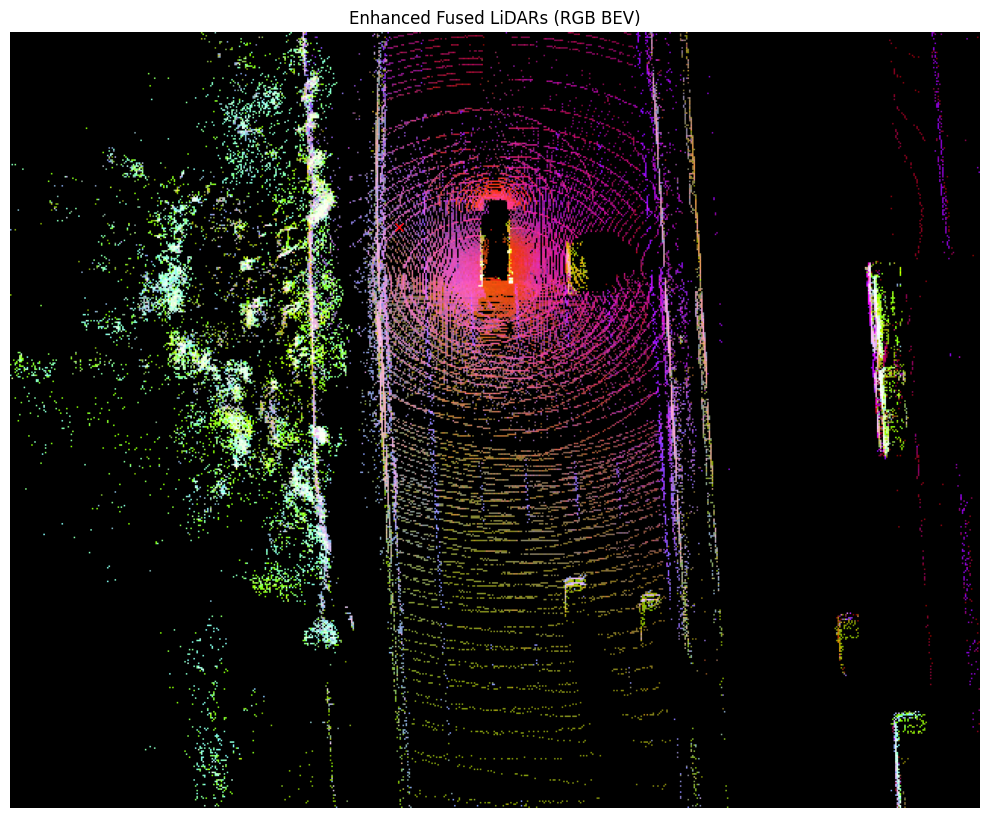

In [ ]:
from scipy.spatial.transform import Rotation as R
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
from truckscenes.utils.geometry_utils import transform_matrix
from pyquaternion import Quaternion
from truckscenes.utils.data_classes import LidarPointCloud


def bev_rgb_enhanced(points, intensities=None,
                     res=0.1,
                     side_range=(-40, 40), fwd_range=(-20, 60),
                     height_range=(-2, 2)):

    x, y, z = points[:, 0], points[:, 1], points[:, 2]
    if intensities is None:
        intensities = np.ones_like(x)

    # Applica il filtro per inquadrare l'area desiderata
    mask = (
        (x > fwd_range[0]) & (x < fwd_range[1]) &
        (y > side_range[0]) & (y < side_range[1])
    )
    x, y, z, intensities = x[mask], y[mask], z[mask], intensities[mask]

    # Converti in coordinate immagine
    x_img = ((x - fwd_range[0]) / res).astype(np.int32)
    y_img = ((y - side_range[0]) / res).astype(np.int32)
    H = int((fwd_range[1] - fwd_range[0]) / res)
    W = int((side_range[1] - side_range[0]) / res)

    # Mappa z e intensità su [0, 255]
    z_scaled = ((np.clip(z, *height_range) - height_range[0]) /
                (height_range[1] - height_range[0]) * 255).astype(np.uint8)
    intensities_scaled = ((intensities - np.min(intensities)) /
                          (np.ptp(intensities) + 1e-8) * 255).astype(np.uint8)

    # Crea 3 canali: R = densità, G = altezza, B = intensità
    R_chan = np.zeros((H, W), dtype=np.uint8)
    G_chan = np.zeros((H, W), dtype=np.uint8)
    B_chan = np.zeros((H, W), dtype=np.uint8)

    for xi, yi, zi, ii in zip(x_img, y_img, z_scaled, intensities_scaled):
        if 0 <= xi < H and 0 <= yi < W:
            G_chan[xi, yi] = max(G_chan[xi, yi], zi)
            B_chan[xi, yi] = max(B_chan[xi, yi], ii)
            R_chan[xi, yi] += 1

    # Normalizza canale R
    if R_chan.max() > 0:
        R_chan = np.clip((R_chan / R_chan.max()) * 255, 0, 255).astype(np.uint8)

    # Equalizzazione (facoltativa ma migliora il contrasto)
    R_eq = cv2.equalizeHist(R_chan)
    G_eq = cv2.equalizeHist(G_chan)
    B_eq = cv2.equalizeHist(B_chan)

    bev = np.stack([R_eq, G_eq, B_eq], axis=-1)
    bev = cv2.resize(bev, (640, 512), interpolation=cv2.INTER_NEAREST)

    return bev


def render_lidar_fused_enhanced(trucksc, sample_token: str, nsweeps: int = 1,
                                res=0.1, side_range=(-40, 40), fwd_range=(-20, 60),
                                height_range=(-3, 2),
                                figsize=(10, 10)):

    record = trucksc.get('sample', sample_token)

    # Trova tutti i token dei sensori lidar
    lidar_tokens = [
        token for channel, token in record['data'].items()
        if trucksc.get('sample_data', token)['sensor_modality'] == 'lidar'
    ]

    all_points = []

    for token in lidar_tokens:
        sd = trucksc.get('sample_data', token)
        sample = trucksc.get('sample', sd['sample_token'])
        chan = sd['channel']
        ref_chan = 'LIDAR_LEFT'
        ref_token = sample['data'][ref_chan]
        ref_sd = trucksc.get('sample_data', ref_token)

        pc, _ = LidarPointCloud.from_file_multisweep(trucksc, sample, chan, ref_chan, nsweeps=nsweeps)
        points = pc.points[:3, :]
        intensity = pc.points[3, :]

        # === Trasformazione in flat ego frame ===
        cs_record = trucksc.get('calibrated_sensor', ref_sd['calibrated_sensor_token'])
        pose_record = trucksc.get('ego_pose', ref_sd['ego_pose_token'])

        ref_to_ego = transform_matrix(cs_record['translation'], Quaternion(cs_record['rotation']))
        ego_yaw = Quaternion(pose_record['rotation']).yaw_pitch_roll[0]
        rotation_flat = np.dot(
            Quaternion(scalar=np.cos(ego_yaw / 2),
                       vector=[0, 0, np.sin(ego_yaw / 2)]).rotation_matrix,
            Quaternion(pose_record['rotation']).inverse.rotation_matrix
        )
        vehicle_flat = np.eye(4)
        vehicle_flat[:3, :3] = rotation_flat
        viewpoint = np.dot(vehicle_flat, ref_to_ego)

        points_h = np.vstack((points, np.ones(points.shape[1])))
        transformed = (viewpoint @ points_h).T[:, :3]

        all_points.append(np.hstack((transformed, intensity.reshape(-1, 1))))

    fused_points = np.vstack(all_points)

    # === Crea immagine BEV ===
    bev_img = bev_rgb_enhanced(fused_points[:, :3], fused_points[:, 3],
                               res=res,
                               side_range=side_range,
                               fwd_range=fwd_range,
                               height_range=height_range)

    # === Mostra immagine ===
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.imshow(bev_img)
    ax.axis('off')
    ax.set_title("Enhanced Fused LiDARs (RGB BEV)")

    # Centro veicolo (x=0, y=0)
    center_x = int((0 - fwd_range[0]) / res * 512 / ((fwd_range[1] - fwd_range[0]) / res))
    center_y = int((0 - side_range[0]) / res * 512 / ((side_range[1] - side_range[0]) / res))
    ax.plot(center_y, center_x, 'rx')

    plt.tight_layout()
    plt.show()


render_lidar_fused_enhanced(trucksc, "34d0b00f1801498c803ec07dce543b72")


## Creazione Dataset

In [5]:
! rm -rf /content/DATASET
! rm -rf /content/runs

### Immagini

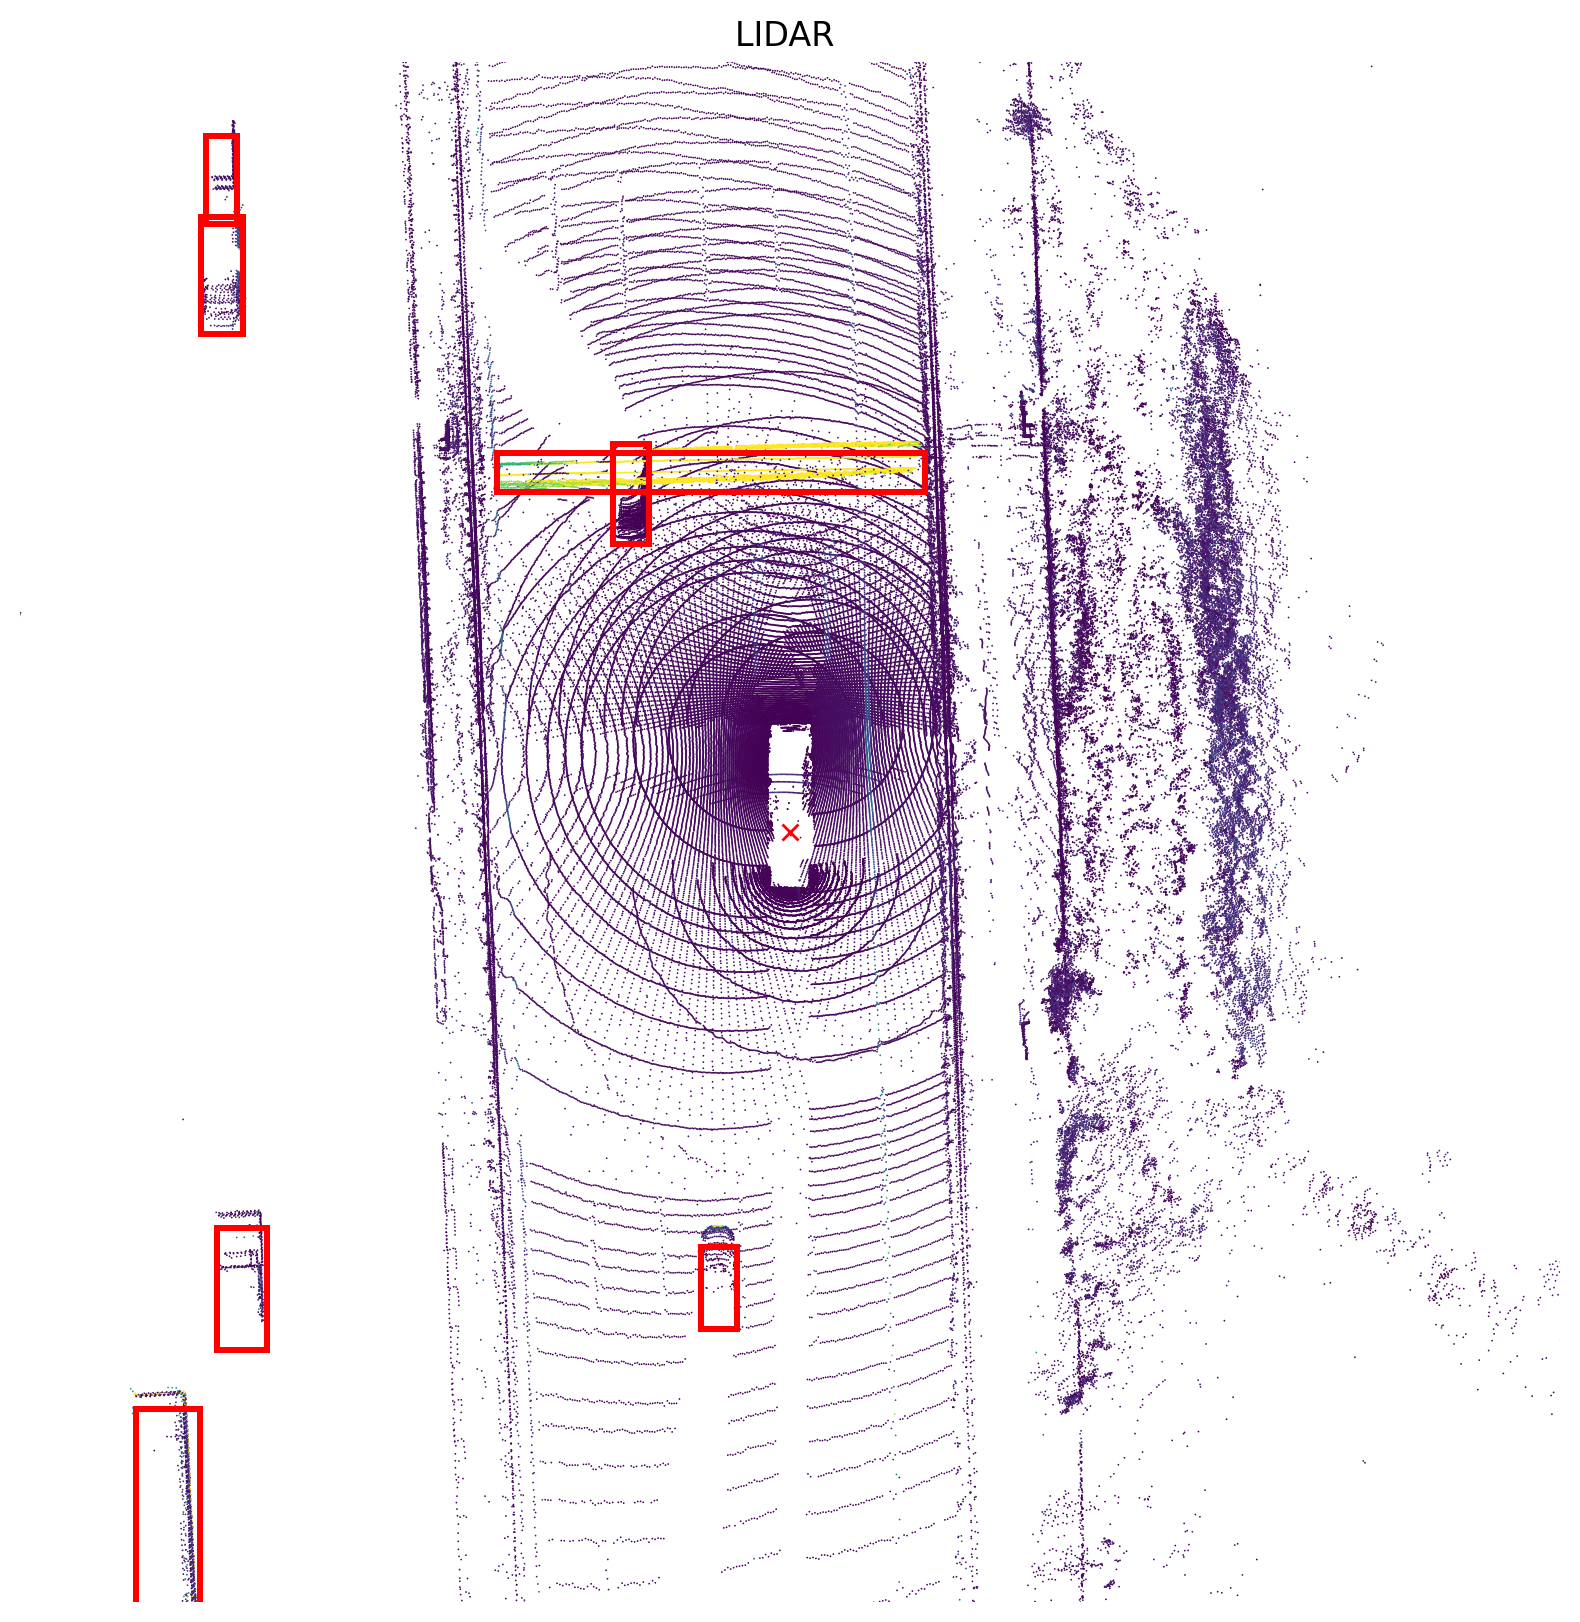

<Figure size 640x480 with 0 Axes>

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable, get_cmap
from matplotlib.colors import Normalize, Colormap
from matplotlib import cm
from matplotlib.axes import Axes
from pyquaternion import Quaternion
from typing import List, Tuple, Union
import matplotlib.patches as patches

# TruckScenes utils
from truckscenes.utils.geometry_utils import transform_matrix, view_points, BoxVisibility
from truckscenes.utils.data_classes import LidarPointCloud



def _render_pc_sample_data(trucksc,
                               sensor_modality: str,
                               sample_data_token: str,
                               with_anns: bool = True,
                               selected_anntokens: List[str] = None,
                               box_vis_level: BoxVisibility = BoxVisibility.ANY,
                               axes_limit: Union[List[float], Tuple[float], float] = 40,
                               ax: Axes = None,
                               nsweeps: int = 1,
                               use_flat_vehicle_coordinates: bool = True,
                               point_scale: float = 1.0,
                               cmap: str = 'viridis',
                               cnorm: bool = True) -> None:

        intensities = []
        points = []

        for sd_token in sample_data_token:
            sd_record = trucksc.get('sample_data', sd_token)

            sample_rec = trucksc.get('sample', sd_record['sample_token'])
            chan = sd_record['channel']
            ref_chan = 'LIDAR_LEFT'
            ref_sd_token = sample_rec['data'][ref_chan]
            ref_sd_record = trucksc.get('sample_data', ref_sd_token)

            if sensor_modality == 'lidar':
                # Get aggregated lidar point cloud in lidar frame.
                pc, _ = LidarPointCloud.from_file_multisweep(trucksc, sample_rec,
                                                             chan, ref_chan,
                                                             nsweeps=nsweeps)
                velocities = None
                intensity = pc.points[3, :]
            else:
                # Get aggregated radar point cloud in reference frame.
                # The point cloud is transformed to the reference frame
                # for visualization purposes.
                pc, _ = RadarPointCloud.from_file_multisweep(trucksc, sample_rec,
                                                             chan, ref_chan,
                                                             nsweeps=nsweeps)

                # Transform radar velocities (x is front, y is left),
                # as these are not transformed when loading the
                # point cloud.
                radar_cs_record = trucksc.get('calibrated_sensor',
                                                   sd_record['calibrated_sensor_token'])
                ref_cs_record = trucksc.get('calibrated_sensor',
                                                 ref_sd_record['calibrated_sensor_token'])
                velocities = pc.points[3:5, :]
                velocities = np.vstack((velocities, np.zeros(pc.points.shape[1])))
                velocities = np.dot(Quaternion(radar_cs_record['rotation']).rotation_matrix,
                                    velocities)
                velocities = np.dot(Quaternion(ref_cs_record['rotation']).rotation_matrix.T,
                                    velocities)
                velocities[2, :] = np.zeros(pc.points.shape[1])
                intensity = pc.points[6, :]

            # By default we render the sample_data top down in the sensor frame.
            # This is slightly inaccurate when rendering the map as the sensor frame may
            # not be perfectly upright.
            if use_flat_vehicle_coordinates:
                # Retrieve transformation matrices for reference point cloud.
                cs_record = trucksc.get('calibrated_sensor',
                                             ref_sd_record['calibrated_sensor_token'])
                pose_record = trucksc.get('ego_pose',
                                               ref_sd_record['ego_pose_token'])
                ref_to_ego = transform_matrix(translation=cs_record['translation'],
                                              rotation=Quaternion(cs_record["rotation"]))

                # Compute rotation between 3D vehicle pose and "flat" vehicle pose
                # (parallel to global z plane).
                ego_yaw = Quaternion(pose_record['rotation']).yaw_pitch_roll[0]
                rotation_vehicle_flat_from_vehicle = np.dot(
                    Quaternion(scalar=np.cos(ego_yaw / 2),
                               vector=[0, 0, np.sin(ego_yaw / 2)]).rotation_matrix,
                    Quaternion(pose_record['rotation']).inverse.rotation_matrix)
                vehicle_flat_from_vehicle = np.eye(4)
                vehicle_flat_from_vehicle[:3, :3] = rotation_vehicle_flat_from_vehicle
                viewpoint = np.dot(vehicle_flat_from_vehicle, ref_to_ego)

                # Rotate upwards
                vehicle_flat_up_from_vehicle_flat = np.eye(4)
                rotation_axis = Quaternion(matrix=viewpoint[:3, :3])
                vehicle_flat_up_from_vehicle_flat[:3, :3] = \
                    Quaternion(axis=rotation_axis.rotate([0, 0, 1]),
                               angle=np.pi/2).rotation_matrix
                viewpoint = np.dot(vehicle_flat_up_from_vehicle_flat, viewpoint)
            else:
                viewpoint = np.eye(4)

            # Show point cloud
            points.append(view_points(pc.points[:3, :], viewpoint, normalize=False))
            intensities.append(intensity)

        points = np.concatenate(points, axis=1)
        intensities = np.concatenate(intensities, axis=0)

        # Colormapping
        if cnorm:
            norm = Normalize(vmin=np.min(intensities), vmax=np.max(intensities), clip=True)
        else:
            norm = None
        mapper = ScalarMappable(norm=norm, cmap=cmap)
        colors = mapper.to_rgba(intensities)[..., :3]

        point_scale = point_scale * 0.4 if sensor_modality == 'lidar' else point_scale * 3.0
        ax.scatter(points[0, :], points[1, :], marker='o',
                   c=colors, s=point_scale, edgecolors='none')

        # Show ego vehicle
        ax.plot(0, 0, 'x', color='red')

        # Show boxes
        if with_anns:
            # Get boxes in lidar frame.box_vis_level
            _, boxes, _ = trucksc.get_sample_data(
                ref_sd_token, box_vis_level=box_vis_level, selected_anntokens=selected_anntokens,
                use_flat_vehicle_coordinates=use_flat_vehicle_coordinates
            )



            # Render boxes
            for box in boxes:
                c = np.array(trucksc.colormap[box.name]) / 255.0
                box.render(ax, view=np.eye(4), colors=(c, c, c), linewidth=2.0)
                print(box)
        # Limit visible range.
        ax.set_xlim(-axes_limit[0], axes_limit[0])
        ax.set_ylim(-axes_limit[1], axes_limit[1])


def render_sample_data(trucksc,
                           sample_data_token: str,
                           with_anns: bool = True,
                           selected_anntokens: List[str] = None,
                           box_vis_level: BoxVisibility = BoxVisibility.ANY,
                           axes_limit: Union[List[float], Tuple[float], float] = 40,
                           ax: Axes = None,
                           nsweeps: int = 1,
                           out_path: str = None,
                           use_flat_vehicle_coordinates: bool = True,
                           point_scale: float = 1.0,
                           cmap: str = 'viridis',
                           cnorm: bool = True) -> None:

        if not isinstance(sample_data_token, list):
            sample_data_token = [sample_data_token]

        if not isinstance(cmap, Colormap):
            cmap = plt.get_cmap(cmap)

        if not isinstance(axes_limit, (list, tuple)):
            axes_limit = [axes_limit, axes_limit]

        # Determine sensor modality
        sensor_modality = trucksc.get('sample_data', sample_data_token[0])['sensor_modality']

        # Render Point Cloud data
        if sensor_modality in ['lidar', 'radar']:
            # Init axes.
            if ax is None:
                _, ax = plt.subplots(1, 1, figsize=(9, 9))

            # Render point cloud data onto axis
            _render_pc_sample_data(trucksc, sensor_modality, sample_data_token, False,
                                        selected_anntokens, box_vis_level, axes_limit,
                                        ax, nsweeps, use_flat_vehicle_coordinates,
                                        point_scale, cmap, cnorm)



        ax.axis('off')
        ax.set_title('{} {labels_type}'.format(sensor_modality.upper(), labels_type=''))
        ax.set_aspect('equal')

        if out_path is not None:
            os.makedirs(os.path.dirname(out_path), exist_ok=True)
            plt.savefig(out_path, bbox_inches='tight', pad_inches=0, transparent=True, dpi=800)

def get_bev_box(box):
    view = np.eye(4)
    corners = view_points(box.corners(), view, normalize=False)[:2, :]
    x_min = np.min(corners[0, :])
    x_max = np.max(corners[0, :])
    y_min = np.min(corners[1, :])
    y_max = np.max(corners[1, :])
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2
    width = x_max - x_min
    height = y_max - y_min
    return x_center, y_center, width, height

def render_lidar_fused(trucksc,
                       sample_token: str,
                       box_vis_level: BoxVisibility = BoxVisibility.ANY,
                       nsweeps: int = 1,
                       out_path: str = None,
                       verbose: bool = True) -> None:

    record = trucksc.get('sample', sample_token)

    lidar_tokens = []
    for channel, token in record['data'].items():
        sd_record = trucksc.get('sample_data', token)
        if sd_record['sensor_modality'] == 'lidar':
            lidar_tokens.append(token)

    if len(lidar_tokens) == 0:
        print(f"Nessun LIDAR per {sample_token}")
        return

    # === Imposta figura quadrata fissa (es: 10x10 pollici a 200 dpi → 2000x2000 px)
    fig_size_inch = 10
    dpi = 200
    fig, ax = plt.subplots(1, 1, figsize=(fig_size_inch, fig_size_inch), dpi=dpi)

    # === Rendering combinato di tutti i lidar del sample
    render_sample_data(
        trucksc,
        sample_data_token=lidar_tokens,   # LISTA dei lidar da fondere
        with_anns=True,
        box_vis_level=box_vis_level,
        axes_limit=(40, 40),  # range XY coerente con annotazioni
        ax=ax,
        nsweeps=nsweeps,
        use_flat_vehicle_coordinates=True,
        point_scale=1.0,
        cmap='viridis',
        cnorm=True
    )

        # === Disegna bounding box usando get_bev_box
    for token in lidar_tokens:
        _, boxes, _ = trucksc.get_sample_data(
            token,
            box_vis_level=box_vis_level,
            use_flat_vehicle_coordinates=True
        )

        for box in boxes:
            x, y, w, h = get_bev_box(box)
            rect = patches.Rectangle((x - w/2, y - h/2), w, h,
                                     linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)

    # === Mostra o salva
    if out_path is not None:
        plt.savefig(out_path, bbox_inches='tight', pad_inches=0)
    else:
        plt.show()


    # === Pulizia finale
    ax.set_title("")
    ax.axis("off")

    # === Salvataggio immagine BEV
    out_img_path = f"DATASET/immagine/{sample_token}.png"
    os.makedirs(os.path.dirname(out_img_path), exist_ok=True)

    plt.savefig(
        out_img_path,
        bbox_inches='tight',   # taglia solo bordi vuoti reali
        pad_inches=0,
        transparent=False
    )
    plt.close(fig)
    #plt.show()



"""
# === Cartella in cui salvare le immagini ===
output_img_dir = "DATASET/immagine"
os.makedirs(output_img_dir, exist_ok=True)

# === Itera su tutti i sample token ===
sample_tokens = [s['token'] for s in trucksc.sample]  # lista completa dei sample_token

for i, sample_token in enumerate(sample_tokens):
    print(f"[{i+1}/{len(sample_tokens)}] Rendering sample: {sample_token}")
    try:
        render_lidar_fused(trucksc, sample_token=sample_token)
    except Exception as e:
        print(f"Errore nel rendering di {sample_token}: {e}")
"""

render_lidar_fused (trucksc, sample_token="31a1c724a02d46a1bbe2b8685fb871a2")
#trucksc.render_sample(token)


In [ ]:
# Specifica il sample_token
sample_token = "34d0b00f1801498c803ec07dce543b72"  # Inserisci il tuo sample_token

# Ottieni i dati del sample
sample = trucksc.get('sample', sample_token)
# Estrai le annotazioni associate al sample
annotation_tokens = sample['anns']


boxes = [trucksc.get_box(ann_token) for ann_token in annotation_tokens]
for box in boxes:
    print(f"box:  {box}")


box:  label: nan, score: nan, xyz: [699177.38, 5320413.07, 593.69], wlh: [1.88, 6.02, 2.01], rot axis: [0.00, 0.00, 1.00], ang(degrees): -63.24, ang(rad): -1.10, vel: nan, nan, nan, name: vehicle.car, token: c1a3722926444838b0aae3aad80b9d2e
box:  label: nan, score: nan, xyz: [699132.87, 5320561.10, 596.37], wlh: [1.95, 4.45, 1.79], rot axis: [-0.00, 0.00, 1.00], ang(degrees): 117.03, ang(rad): 2.04, vel: nan, nan, nan, name: vehicle.car, token: ff0acb2b04124e36a0e42a7df3b312ba
box:  label: nan, score: nan, xyz: [699135.94, 5320500.59, 595.66], wlh: [1.55, 4.54, 2.08], rot axis: [0.00, 0.00, 1.00], ang(degrees): -64.54, ang(rad): -1.13, vel: nan, nan, nan, name: vehicle.trailer, token: 5b132c99323443c7b1cb098affb29509
box:  label: nan, score: nan, xyz: [699223.98, 5320348.53, 594.04], wlh: [1.18, 0.31, 3.23], rot axis: [-0.00, -0.00, 1.00], ang(degrees): -59.56, ang(rad): -1.04, vel: nan, nan, nan, name: static_object.traffic_sign, token: 1276de0ac0f04e538fbfdb29de31d9ba
box:  label: na

### Immagini + annotazioni

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable, get_cmap
from matplotlib.colors import Normalize, Colormap
from matplotlib import cm
from matplotlib.axes import Axes
from pyquaternion import Quaternion
from typing import List, Tuple, Union
import matplotlib.patches as patches

# TruckScenes utils
from truckscenes.utils.geometry_utils import transform_matrix, view_points, BoxVisibility
from truckscenes.utils.data_classes import LidarPointCloud



def _render_pc_sample_data(trucksc,
                               sensor_modality: str,
                               sample_data_token: str,
                               with_anns: bool = True,
                               selected_anntokens: List[str] = None,
                               box_vis_level: BoxVisibility = BoxVisibility.ANY,
                               axes_limit: Union[List[float], Tuple[float], float] = 40,
                               ax: Axes = None,
                               nsweeps: int = 1,
                               use_flat_vehicle_coordinates: bool = True,
                               point_scale: float = 1.0,
                               cmap: str = 'viridis',
                               cnorm: bool = True) -> None:

        intensities = []
        points = []

        for sd_token in sample_data_token:
            sd_record = trucksc.get('sample_data', sd_token)

            sample_rec = trucksc.get('sample', sd_record['sample_token'])
            chan = sd_record['channel']
            ref_chan = 'LIDAR_LEFT'
            ref_sd_token = sample_rec['data'][ref_chan]
            ref_sd_record = trucksc.get('sample_data', ref_sd_token)

            if sensor_modality == 'lidar':
                # Get aggregated lidar point cloud in lidar frame.
                pc, _ = LidarPointCloud.from_file_multisweep(trucksc, sample_rec,
                                                             chan, ref_chan,
                                                             nsweeps=nsweeps)
                velocities = None
                intensity = pc.points[3, :]
            else:
                # Get aggregated radar point cloud in reference frame.
                # The point cloud is transformed to the reference frame
                # for visualization purposes.
                pc, _ = RadarPointCloud.from_file_multisweep(trucksc, sample_rec,
                                                             chan, ref_chan,
                                                             nsweeps=nsweeps)

                # Transform radar velocities (x is front, y is left),
                # as these are not transformed when loading the
                # point cloud.
                radar_cs_record = trucksc.get('calibrated_sensor',
                                                   sd_record['calibrated_sensor_token'])
                ref_cs_record = trucksc.get('calibrated_sensor',
                                                 ref_sd_record['calibrated_sensor_token'])
                velocities = pc.points[3:5, :]
                velocities = np.vstack((velocities, np.zeros(pc.points.shape[1])))
                velocities = np.dot(Quaternion(radar_cs_record['rotation']).rotation_matrix,
                                    velocities)
                velocities = np.dot(Quaternion(ref_cs_record['rotation']).rotation_matrix.T,
                                    velocities)
                velocities[2, :] = np.zeros(pc.points.shape[1])
                intensity = pc.points[6, :]

            # By default we render the sample_data top down in the sensor frame.
            # This is slightly inaccurate when rendering the map as the sensor frame may
            # not be perfectly upright.
            if use_flat_vehicle_coordinates:
                # Retrieve transformation matrices for reference point cloud.
                cs_record = trucksc.get('calibrated_sensor',
                                             ref_sd_record['calibrated_sensor_token'])
                pose_record = trucksc.get('ego_pose',
                                               ref_sd_record['ego_pose_token'])
                ref_to_ego = transform_matrix(translation=cs_record['translation'],
                                              rotation=Quaternion(cs_record["rotation"]))

                # Compute rotation between 3D vehicle pose and "flat" vehicle pose
                # (parallel to global z plane).
                ego_yaw = Quaternion(pose_record['rotation']).yaw_pitch_roll[0]
                rotation_vehicle_flat_from_vehicle = np.dot(
                    Quaternion(scalar=np.cos(ego_yaw / 2),
                               vector=[0, 0, np.sin(ego_yaw / 2)]).rotation_matrix,
                    Quaternion(pose_record['rotation']).inverse.rotation_matrix)
                vehicle_flat_from_vehicle = np.eye(4)
                vehicle_flat_from_vehicle[:3, :3] = rotation_vehicle_flat_from_vehicle
                viewpoint = np.dot(vehicle_flat_from_vehicle, ref_to_ego)

                # Rotate upwards
                vehicle_flat_up_from_vehicle_flat = np.eye(4)
                rotation_axis = Quaternion(matrix=viewpoint[:3, :3])
                vehicle_flat_up_from_vehicle_flat[:3, :3] = \
                    Quaternion(axis=rotation_axis.rotate([0, 0, 1]),
                               angle=np.pi/2).rotation_matrix
                viewpoint = np.dot(vehicle_flat_up_from_vehicle_flat, viewpoint)
            else:
                viewpoint = np.eye(4)

            # Show point cloud
            points.append(view_points(pc.points[:3, :], viewpoint, normalize=False))
            intensities.append(intensity)

        points = np.concatenate(points, axis=1)
        intensities = np.concatenate(intensities, axis=0)

        # Colormapping
        if cnorm:
            norm = Normalize(vmin=np.min(intensities), vmax=np.max(intensities), clip=True)
        else:
            norm = None
        mapper = ScalarMappable(norm=norm, cmap=cmap)
        colors = mapper.to_rgba(intensities)[..., :3]

        point_scale = point_scale * 0.4 if sensor_modality == 'lidar' else point_scale * 3.0
        ax.scatter(points[0, :], points[1, :], marker='o',
                   c=colors, s=point_scale, edgecolors='none')

        # Show ego vehicle
        ax.plot(0, 0, 'x', color='red')

        # Show boxes
        if with_anns:
            # Get boxes in lidar frame.box_vis_level
            _, boxes, _ = trucksc.get_sample_data(
                ref_sd_token, box_vis_level=box_vis_level, selected_anntokens=selected_anntokens,
                use_flat_vehicle_coordinates=use_flat_vehicle_coordinates
            )



            # Render boxes
            for box in boxes:
                c = np.array(trucksc.colormap[box.name]) / 255.0
                box.render(ax, view=np.eye(4), colors=(c, c, c), linewidth=2.0)
                print(box)
        # Limit visible range.
        ax.set_xlim(-axes_limit[0], axes_limit[0])
        ax.set_ylim(-axes_limit[1], axes_limit[1])


def render_sample_data(trucksc,
                           sample_data_token: str,
                           with_anns: bool = True,
                           selected_anntokens: List[str] = None,
                           box_vis_level: BoxVisibility = BoxVisibility.ANY,
                           axes_limit: Union[List[float], Tuple[float], float] = 40,
                           ax: Axes = None,
                           nsweeps: int = 1,
                           out_path: str = None,
                           use_flat_vehicle_coordinates: bool = True,
                           point_scale: float = 1.0,
                           cmap: str = 'viridis',
                           cnorm: bool = True) -> None:

        if not isinstance(sample_data_token, list):
            sample_data_token = [sample_data_token]

        if not isinstance(cmap, Colormap):
            cmap = plt.get_cmap(cmap)

        if not isinstance(axes_limit, (list, tuple)):
            axes_limit = [axes_limit, axes_limit]

        # Determine sensor modality
        sensor_modality = trucksc.get('sample_data', sample_data_token[0])['sensor_modality']

        # Render Point Cloud data
        if sensor_modality in ['lidar', 'radar']:
            # Init axes.
            if ax is None:
                _, ax = plt.subplots(1, 1, figsize=(9, 9))

            # Render point cloud data onto axis
            _render_pc_sample_data(trucksc, sensor_modality, sample_data_token, False,
                                        selected_anntokens, box_vis_level, axes_limit,
                                        ax, nsweeps, use_flat_vehicle_coordinates,
                                        point_scale, cmap, cnorm)



        ax.axis('off')
        ax.set_title('{} {labels_type}'.format(sensor_modality.upper(), labels_type=''))
        ax.set_aspect('equal')

        if out_path is not None:
            os.makedirs(os.path.dirname(out_path), exist_ok=True)
            plt.savefig(out_path, bbox_inches='tight', pad_inches=0, transparent=True, dpi=800)

    # === Funzione per ottenere x, y, w, h da un Box in vista BEV
def get_bev_box(box):
        view = np.eye(4)
        corners = view_points(box.corners(), view, normalize=False)[:2, :]  # Shape (2, 8)

        x_min = np.min(corners[0, :])
        x_max = np.max(corners[0, :])
        y_min = np.min(corners[1, :])
        y_max = np.max(corners[1, :])

        x_center = (x_min + x_max) / 2
        y_center = (y_min + y_max) / 2
        width = x_max - x_min
        height = y_max - y_min

        return x_center, y_center, width, height

IMG_WIDTH = 2000  # pixel
IMG_HEIGHT = 2000
AXES_LIMIT = 40  # metri → [-40, +40] quindi 80x80 m

def convert_to_yolo_coords(x, y, w, h):
    x_px = (x + AXES_LIMIT) / (2 * AXES_LIMIT)
    y_px = (y + AXES_LIMIT) / (2 * AXES_LIMIT)
    w_px = w / (2 * AXES_LIMIT)
    h_px = h / (2 * AXES_LIMIT)

    # Clipping tra 0 e 1
    x_px = np.clip(x_px, 0.0, 1.0)
    y_px = np.clip(y_px, 0.0, 1.0)
    w_px = np.clip(w_px, 0.0, 1.0)
    h_px = np.clip(h_px, 0.0, 1.0)

    return x_px, y_px, w_px, h_px


def save_yolo_labels(trucksc, sample_token, out_dir="DATASET/label", class_map=None):
    os.makedirs(out_dir, exist_ok=True)
    sample = trucksc.get("sample", sample_token)

    # === Usa LIDAR_LEFT come canale di riferimento (fisso, come nel rendering)
    ref_chan = "LIDAR_LEFT"
    ref_sd_token = sample["data"].get(ref_chan)
    if ref_sd_token is None:
        print(f"Nessun {ref_chan} per sample {sample_token}")
        return

    # === Prendi le box con coordinate flatten (BEV)
    _, boxes, _ = trucksc.get_sample_data(
        ref_sd_token,
        use_flat_vehicle_coordinates=True
    )

    out_path = os.path.join(out_dir, f"{sample_token}.txt")
    with open(out_path, "w") as f:
        for box in boxes:
            x, y, w, h = get_bev_box(box)
            x_norm, y_norm, w_norm, h_norm = convert_to_yolo_coords(x, y, w, h)

            if class_map is None:
                class_id = 0
            else:
                class_id = class_map.get(box.name, 0)

            f.write(f"{class_id} {x_norm:.6f} {y_norm:.6f} {w_norm:.6f} {h_norm:.6f}\n")

    print(f"Salvato: {out_path}")


def get_class_map(trucksc):
    all_class_names = set()
    for sample in trucksc.sample:
        for ann_token in sample["anns"]:
            box = trucksc.get_box(ann_token)
            all_class_names.add(box.name)
    sorted_class_names = sorted(all_class_names)
    print(sorted_class_names)
    return {name: idx for idx, name in enumerate(sorted_class_names)}


def render_lidar_fused(trucksc,
                       sample_token: str,
                       box_vis_level: BoxVisibility = BoxVisibility.ANY,
                       nsweeps: int = 1,
                       out_path: str = None,
                       verbose: bool = True) -> None:

    record = trucksc.get('sample', sample_token)

    lidar_tokens = []
    for channel, token in record['data'].items():
        sd_record = trucksc.get('sample_data', token)
        if sd_record['sensor_modality'] == 'lidar':
            lidar_tokens.append(token)

    if len(lidar_tokens) == 0:
        print(f"Nessun LIDAR per {sample_token}")
        return

    # === Imposta figura quadrata fissa (es: 10x10 pollici a 200 dpi → 2000x2000 px)
    fig_size_inch = 10
    dpi = 200
    fig, ax = plt.subplots(1, 1, figsize=(fig_size_inch, fig_size_inch), dpi=dpi)

    # === Rendering combinato di tutti i lidar del sample
    render_sample_data(
        trucksc,
        sample_data_token=lidar_tokens,   # LISTA dei lidar da fondere
        with_anns=True,
        box_vis_level=box_vis_level,
        axes_limit=(40, 40),  # range XY coerente con annotazioni
        ax=ax,
        nsweeps=nsweeps,
        use_flat_vehicle_coordinates=True,
        point_scale=1.0,
        cmap='viridis',
        cnorm=True
    )


    # === Pulizia finale
    ax.set_title("")
    ax.axis("off")

    # === Salvataggio immagine BEV
    out_img_path = f"DATASET/immagine/{sample_token}.png"
    os.makedirs(os.path.dirname(out_img_path), exist_ok=True)

    plt.savefig(
        out_img_path,
        bbox_inches='tight',   # taglia solo bordi vuoti reali
        pad_inches=0,
        transparent=False
    )
    plt.close(fig)


# === Sample token da cui riprendere ===
start_from_token = "e9f4a50a1b0a41a492edf7a4870f594c"
skip = True



# === Cartella in cui salvare le immagini ===
output_img_dir = "DATASET/immagine"
os.makedirs(output_img_dir, exist_ok=True)
maps=get_class_map(trucksc)
# === Itera su tutti i sample token ===
sample_tokens = [s['token'] for s in trucksc.sample]  # lista completa dei sample_token

for i, sample_token in enumerate(sample_tokens):
    if skip:
      if sample_token == start_from_token:
          skip = False
      else:
          continue  # salta fino al token scelto
    print(f"[{i+1}/{len(sample_tokens)}] Rendering sample: {sample_token}")
    try:
        render_lidar_fused(trucksc, sample_token=sample_token)
        save_yolo_labels(trucksc, sample_token=sample_token, class_map=maps)
    except Exception as e:
        print(f"Errore nel rendering di {sample_token}: {e}")

['animal', 'human.pedestrian.adult', 'human.pedestrian.child', 'human.pedestrian.construction_worker', 'human.pedestrian.stroller', 'movable_object.barrier', 'movable_object.trafficcone', 'static_object.traffic_sign', 'vehicle.bicycle', 'vehicle.bus.rigid', 'vehicle.car', 'vehicle.construction', 'vehicle.ego_trailer', 'vehicle.motorcycle', 'vehicle.other', 'vehicle.trailer', 'vehicle.train', 'vehicle.truck']
[321/400] Rendering sample: e9f4a50a1b0a41a492edf7a4870f594c
Salvato: DATASET/label/e9f4a50a1b0a41a492edf7a4870f594c.txt
[322/400] Rendering sample: 80587e2bcbc24524967ae3d9ebb2517a
Salvato: DATASET/label/80587e2bcbc24524967ae3d9ebb2517a.txt
[323/400] Rendering sample: ce95e0afbb7245018e8645c3fd8a1bc6
Salvato: DATASET/label/ce95e0afbb7245018e8645c3fd8a1bc6.txt
[324/400] Rendering sample: 3d64d76d8a914f1dad6e09956d6443b7
Salvato: DATASET/label/3d64d76d8a914f1dad6e09956d6443b7.txt
[325/400] Rendering sample: db3eb0f710004882b55e2dd1e7b9f606
Salvato: DATASET/label/db3eb0f710004882b55e

In [6]:
import os
import shutil
import random

# === Config ===
img_dir = "DATASET/immagine"
label_dir = "DATASET/label"
output_img_dir = "DATASET/images"
output_label_dir = "DATASET/labels"
val_ratio = 0.1  # 10% validazione

# === Crea cartelle
for split in ["train", "val"]:
    os.makedirs(os.path.join(output_img_dir, split), exist_ok=True)
    os.makedirs(os.path.join(output_label_dir, split), exist_ok=True)

# === Prendi lista immagini
all_images = [f for f in os.listdir(img_dir) if f.endswith(".png")]
random.shuffle(all_images)

# === Dividi
val_count = int(len(all_images) * val_ratio)
val_images = set(all_images[:val_count])

# === Copia file
for img_file in all_images:
    base_name = os.path.splitext(img_file)[0]
    label_file = base_name + ".txt"

    split = "val" if img_file in val_images else "train"

    shutil.copy(os.path.join(img_dir, img_file),
                os.path.join(output_img_dir, split, img_file))

    src_label_path = os.path.join(label_dir, label_file)
    if os.path.exists(src_label_path):
        shutil.copy(src_label_path,
                    os.path.join(output_label_dir, split, label_file))
    else:
        print(f"⚠️ Warning: Label mancante per {img_file}")


In [7]:
!rm -rf DATASET/label
!rm -rf DATASET/immagine

In [9]:
import shutil
from google.colab import files
shutil.make_archive("DATASET", 'zip', "DATASET")
files.download("DATASET.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## YOLO traning

In [8]:
!pip install ultralytics


In [ ]:
from ultralytics import YOLO

# Carica un modello pre-addestrato (es. yolov8n per iniziare leggero)
model = YOLO('yolov8n.pt')
model.train(
    data="DATASET/dataset.yaml",  # percorso al tuo file yaml
    epochs=50,                    # o meno per test iniziale
    imgsz=640,                    # o 800/1024 se hai immagini grandi
    batch=16,                     # regola in base alla RAM/GPU
    name="yolo_bev_lidar"         # nome del progetto di output
)


Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=DATASET/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_bev_lidar, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretraine

train: Scanning /content/DATASET/labels/train... 360 images, 0 backgrounds, 0 corrupt: 100%|██████████| 360/360 [00:00<00:00, 403.10it/s]

train: New cache created: /content/DATASET/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1709.2±1285.1 MB/s, size: 1438.1 KB)


val: Scanning /content/DATASET/labels/val... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<00:00, 265.22it/s]

val: New cache created: /content/DATASET/labels/val.cache


Plotting labels to runs/detect/yolo_bev_lidar/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000455, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo_bev_lidar
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.91G      4.249      5.078      2.788        964        640: 100%|██████████| 23/23 [00:22<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         40       2611     0.0125     0.0125    0.00912    0.00182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.97G      3.623      4.428       2.18        554        640: 100%|██████████| 23/23 [00:23<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         40       2611   0.000837     0.0375     0.0059    0.00285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         5G      3.384      3.683      1.904        757        640: 100%|██████████| 23/23 [00:20<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]


                   all         40       2611     0.0869      0.109     0.0885     0.0403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       5.6G      3.211      3.307      1.787        525        640: 100%|██████████| 23/23 [00:18<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]


                   all         40       2611       0.56     0.0855      0.093     0.0528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.62G      3.137      3.205      1.714        781        640: 100%|██████████| 23/23 [00:19<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         40       2611      0.158      0.129      0.103     0.0686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.63G      3.028      3.076      1.676        621        640: 100%|██████████| 23/23 [00:18<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         40       2611        0.2     0.0982     0.0928     0.0616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.64G      2.952      3.008      1.647        561        640: 100%|██████████| 23/23 [00:18<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         40       2611       0.31     0.0838      0.105     0.0667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.67G      2.963      2.952      1.616        627        640: 100%|██████████| 23/23 [00:19<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         40       2611      0.101      0.108       0.11     0.0723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.69G      2.835      2.777      1.574        831        640: 100%|██████████| 23/23 [00:17<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40       2611       0.15      0.114      0.107     0.0714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       5.7G      2.832      2.773      1.571        606        640: 100%|██████████| 23/23 [00:19<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]


                   all         40       2611      0.325     0.0982      0.105     0.0689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.71G      2.766      2.728      1.555        703        640: 100%|██████████| 23/23 [00:18<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         40       2611      0.199      0.108      0.116     0.0798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.74G      2.767       2.68      1.532        589        640: 100%|██████████| 23/23 [00:19<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         40       2611      0.313      0.101      0.123     0.0841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.75G      2.722      2.619      1.506        649        640: 100%|██████████| 23/23 [00:18<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         40       2611      0.373     0.0945      0.118     0.0805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.77G      2.677      2.613      1.516        466        640: 100%|██████████| 23/23 [00:18<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         40       2611      0.307      0.116      0.136     0.0873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.78G      2.684      2.605      1.514        523        640: 100%|██████████| 23/23 [00:19<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         40       2611      0.375      0.109      0.141     0.0915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.81G      2.683      2.537      1.488        831        640: 100%|██████████| 23/23 [00:17<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40       2611      0.187      0.147      0.141     0.0868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.82G      2.617      2.533      1.487        444        640: 100%|██████████| 23/23 [00:19<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         40       2611      0.206      0.139      0.154      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.84G      2.575      2.496      1.474        506        640: 100%|██████████| 23/23 [00:19<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         40       2611      0.223      0.142      0.161      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.85G       2.62      2.469      1.469        829        640: 100%|██████████| 23/23 [00:18<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         40       2611      0.198      0.153      0.158      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.87G      2.527      2.393       1.44        405        640: 100%|██████████| 23/23 [00:18<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40       2611      0.197      0.143      0.149      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.89G      2.548      2.421      1.455        648        640: 100%|██████████| 23/23 [00:18<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40       2611      0.189      0.144      0.156      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.91G      2.538      2.432      1.471        644        640: 100%|██████████| 23/23 [00:19<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         40       2611      0.136       0.14      0.143     0.0975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.92G       2.53      2.407      1.464        466        640: 100%|██████████| 23/23 [00:18<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40       2611      0.178      0.161      0.152      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.94G      2.509      2.352      1.444        692        640: 100%|██████████| 23/23 [00:18<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         40       2611      0.184      0.167      0.167      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.96G      2.489      2.339       1.44        415        640: 100%|██████████| 23/23 [00:17<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         40       2611      0.233      0.154      0.162      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.98G      2.488       2.31      1.429        602        640: 100%|██████████| 23/23 [00:17<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         40       2611      0.169      0.158      0.165      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.99G      2.476      2.335      1.433        592        640: 100%|██████████| 23/23 [00:19<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40       2611       0.16       0.18       0.16       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.01G      2.455      2.281      1.423        493        640: 100%|██████████| 23/23 [00:18<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         40       2611        0.2      0.171      0.167       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.03G      2.472      2.329      1.432        432        640: 100%|██████████| 23/23 [00:19<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         40       2611      0.203      0.165      0.169      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.04G      2.434      2.291      1.425        498        640: 100%|██████████| 23/23 [00:17<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         40       2611      0.171      0.186      0.172       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.05G      2.403      2.236        1.4        408        640: 100%|██████████| 23/23 [00:19<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         40       2611      0.173      0.179      0.169      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.08G        2.4      2.253      1.385        565        640: 100%|██████████| 23/23 [00:18<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all         40       2611      0.241      0.165      0.167      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       6.1G       2.38      2.207      1.387        666        640: 100%|██████████| 23/23 [00:20<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         40       2611      0.232      0.155       0.17      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.11G      2.411      2.236      1.388        874        640: 100%|██████████| 23/23 [00:18<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         40       2611       0.21      0.166      0.175      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.12G      2.408      2.238      1.399        708        640: 100%|██████████| 23/23 [00:17<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         40       2611      0.206      0.176      0.172      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.15G      2.364      2.224      1.399        443        640: 100%|██████████| 23/23 [00:19<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         40       2611      0.156      0.182      0.167      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.16G      2.365      2.208      1.388        668        640: 100%|██████████| 23/23 [00:17<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         40       2611       0.17      0.176      0.169       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.18G      2.359      2.209      1.385        562        640: 100%|██████████| 23/23 [00:18<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         40       2611      0.223      0.178      0.176      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.19G      2.395      2.202      1.385        659        640: 100%|██████████| 23/23 [00:18<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         40       2611      0.191       0.17      0.173      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.21G      2.384      2.218      1.384        513        640: 100%|██████████| 23/23 [00:18<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         40       2611      0.204      0.175      0.173      0.131


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.23G      2.282      2.394      1.358        379        640: 100%|██████████| 23/23 [00:21<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         40       2611      0.195       0.18      0.178      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.25G      2.246      2.291      1.327        411        640: 100%|██████████| 23/23 [00:19<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         40       2611      0.188      0.175      0.171      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.26G       2.21      2.269      1.335        281        640: 100%|██████████| 23/23 [00:24<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         40       2611      0.189      0.186      0.177      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.28G      2.161      2.225      1.319        159        640: 100%|██████████| 23/23 [00:18<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         40       2611      0.197      0.184      0.176      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.29G      2.162        2.2      1.271        629        640:  13%|█▎        | 3/23 [00:01<00:07,  2.62it/s]

In [5]:
import shutil
from google.colab import files
shutil.make_archive("runs", 'zip', "runs")
files.download("runs.zip")





<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

image_path="/content/DATASET/images/val/da505831bbb84ffc8e5ce6cf794037be.png"
# Carica il modello addestrato
model = YOLO("runs/detect/yolo_bev_lidar/weights/best.pt")
results = model.predict(source="/content/DATASET/images/val/da505831bbb84ffc8e5ce6cf794037be.png", save=True, conf=0.1)
output_img = results[0].save_dir + "/" + os.path.basename(image_path)




image 1/1 /content/DATASET/images/val/0531b8003c4941c481d29ed1caa924f7.png: 640x640 1 vehicle.ego_trailer, 7.3ms
Speed: 3.8ms preprocess, 7.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5
